# SEATTLE AIRBNB LISTED HOUSE PRICES

This notebook looks at the Seattle Listed Houses Prices datasets.


My analysis consists of using the following two datasets:
        1) listings.csv - includes full descriptions and average review score
            2) reviews.csv - includes unique id for each reviewer and detailed comments.

# 1. Business Understanding and Business Questions

After a thorough assessment of the data, the main aim of this analysis was to determine the answers to the following three questions:
1) What are the most expensive Neighborhoods to stay in Seattle and what drives the prices? 
2) What are the key factors that influence price?
3) Is there a relationship between review comments and prices?

# 2. Data Understanding

# Importing the neccesary Libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [216]:
df=pd.read_csv("listings.csv")

In [217]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [218]:
df.shape #3818 rows and 92 columns

(3818, 92)

In [219]:
df.select_dtypes(include=['object']).columns

Index([u'listing_url', u'last_scraped', u'name', u'summary', u'space',
       u'description', u'experiences_offered', u'neighborhood_overview',
       u'notes', u'transit', u'thumbnail_url', u'medium_url', u'picture_url',
       u'xl_picture_url', u'host_url', u'host_name', u'host_since',
       u'host_location', u'host_about', u'host_response_time',
       u'host_response_rate', u'host_acceptance_rate', u'host_is_superhost',
       u'host_thumbnail_url', u'host_picture_url', u'host_neighbourhood',
       u'host_verifications', u'host_has_profile_pic',
       u'host_identity_verified', u'street', u'neighbourhood',
       u'neighbourhood_cleansed', u'neighbourhood_group_cleansed', u'city',
       u'state', u'zipcode', u'market', u'smart_location', u'country_code',
       u'country', u'is_location_exact', u'property_type', u'room_type',
       u'bed_type', u'amenities', u'price', u'weekly_price', u'monthly_price',
       u'security_deposit', u'cleaning_fee', u'extra_people',
       u'cal

In [222]:
df.select_dtypes(include=['float64','int64']).columns

Index([u'id', u'scrape_id', u'host_id', u'host_listings_count',
       u'host_total_listings_count', u'latitude', u'longitude',
       u'accommodates', u'bathrooms', u'bedrooms', u'beds', u'square_feet',
       u'guests_included', u'minimum_nights', u'maximum_nights',
       u'availability_30', u'availability_60', u'availability_90',
       u'availability_365', u'number_of_reviews', u'review_scores_rating',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'license',
       u'calculated_host_listings_count', u'reviews_per_month'],
      dtype='object')

In [223]:
len(df.select_dtypes(include=['float64','int64']).columns) #30 numerical columns
len(df.select_dtypes(include=['object']).columns) #62 categorical columns

62

# A look at the number of missing values

In [224]:
a=df.select_dtypes(include=['float64','int64']).isnull().mean()
a[a>0]

host_listings_count            0.000524
host_total_listings_count      0.000524
bathrooms                      0.004191
bedrooms                       0.001572
beds                           0.000262
square_feet                    0.974594
review_scores_rating           0.169460
review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_checkin          0.172342
review_scores_communication    0.170508
review_scores_location         0.171556
review_scores_value            0.171818
license                        1.000000
reviews_per_month              0.164222
dtype: float64

In [225]:
b=df.select_dtypes(include=['object']).isnull().mean()
b[b>0]

summary                   0.046359
space                     0.149031
neighborhood_overview     0.270299
notes                     0.420639
transit                   0.244631
thumbnail_url             0.083814
medium_url                0.083814
xl_picture_url            0.083814
host_name                 0.000524
host_since                0.000524
host_location             0.002095
host_about                0.224987
host_response_time        0.136983
host_response_rate        0.136983
host_acceptance_rate      0.202462
host_is_superhost         0.000524
host_thumbnail_url        0.000524
host_picture_url          0.000524
host_neighbourhood        0.078575
host_has_profile_pic      0.000524
host_identity_verified    0.000524
neighbourhood             0.108958
zipcode                   0.001833
property_type             0.000262
weekly_price              0.473808
monthly_price             0.602672
security_deposit          0.511262
cleaning_fee              0.269775
first_review        

# Business Question 1: What are the most expensive Neighborhoods to stay in Seattle and what drives the prices?

To answer this question, we first need to convert the price variable into numeric.
We are concentrating on the price variable and not weekly price or monthly price as they both have significant missing values


In [226]:
df['price']=df.price.str.replace('$','')
df['price']=df.price.str.replace(',','')

In [227]:
df['price']=pd.to_numeric(df['price'])

In [228]:
# grouping neighbourhood areas by highest average price
df1 = df.groupby(['neighbourhood_group_cleansed'])['price'].mean()
df1=pd.DataFrame(df1)
df1=df1.sort_values('price',ascending=False)
df1.head()

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124


Text(0,0.5,u'Avg Price')

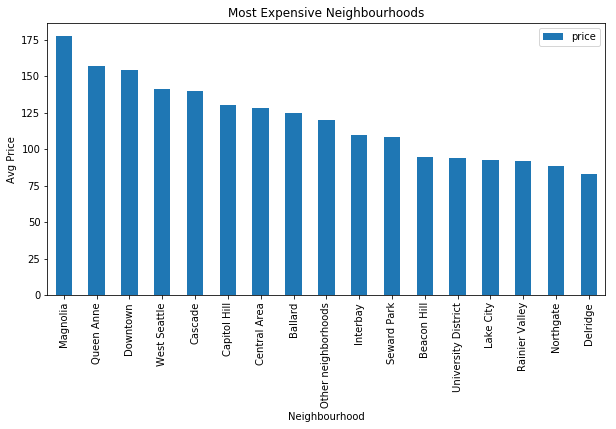

In [229]:
# Plotting the values
graph=df1.plot(kind='bar',title='Most Expensive Neighbourhoods',figsize=(10,5))
graph.set_xlabel("Neighbourhood")
graph.set_ylabel("Avg Price")


The number of listed homes for magnolia is almost 1/10th of the listed homes in other neighborhoods such as Queen Anne. To get a better picture, we will look at the top 20 expensive places in all neighbourhoods and compare the prices

In [230]:
df2=df.groupby('neighbourhood_group_cleansed')['price'].nlargest(20)
df2=df2.reset_index(level=1, drop=True)
df2=pd.DataFrame(df2)
df2.head()
df3=df2.groupby(['neighbourhood_group_cleansed'])['price'].mean()
df3=pd.DataFrame(df3)
df3=df3.sort_values('price',ascending=False)

Text(0,0.5,u'Avg Price')

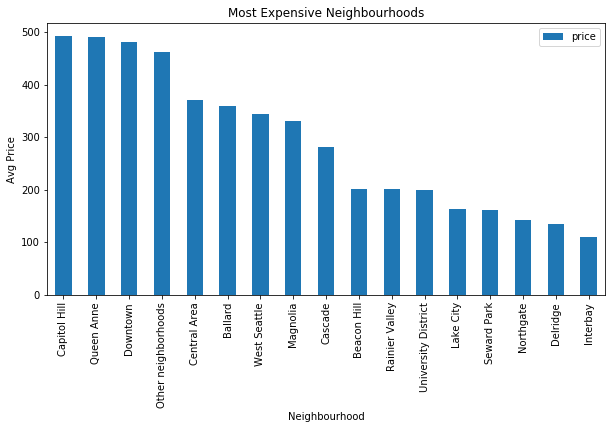

In [231]:
graph=df3.plot(kind='bar',title='Most Expensive Neighbourhoods',figsize=(10,5))
graph.set_xlabel("Neighbourhood")
graph.set_ylabel("Avg Price")
# graph.set_xticklabels()

As we can see Capitol Hill, Queen Avenue, Downtown etc. are slightly more expensive on an average than the other neighborhoods in Seattle.

Now we want to see if the variable room_type especially where people have listed Entire homes has any relation with the neighbourhoods

In [232]:
df4=pd.DataFrame({'count' : df.groupby( [ "neighbourhood_group_cleansed","room_type"] ).size()}).reset_index()

In [233]:
df5=df4[df4['room_type']=='Entire home/apt']
df5=df5.sort_values('count', ascending=False)
df5.head()


,neighbourhood_group_cleansed,room_type,count
29,Other neighborhoods,Entire home/apt,492
16,Downtown,Entire home/apt,471
5,Capitol Hill,Entire home/apt,384
32,Queen Anne,Entire home/apt,231
11,Central Area,Entire home/apt,225


The graph below indicates that people tend to list their entire homes/apartments in the more expensive neighborhoods and hence it can be inferred that due to the prices of listing the entire homes being higher than private or shared rooms, these neighborhoods are more expensive.

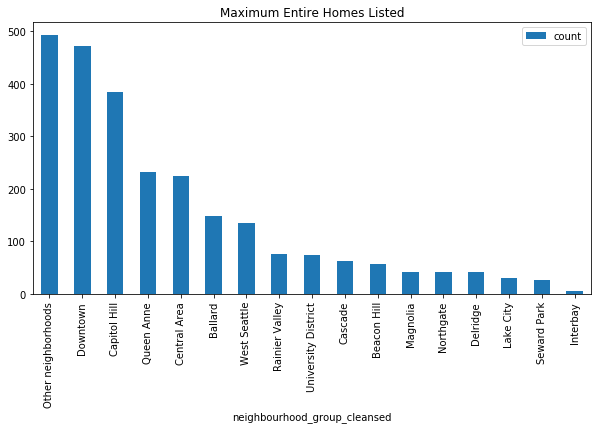

In [234]:
df5.plot.bar(x="neighbourhood_group_cleansed",title='Maximum Entire Homes Listed',figsize=(10,5))

# What do the amenities look like in the top 5 neighbourhood?

In [235]:
fields=['Downtown','Queen Anne','Capitol Hill','Ballard','Central Area']
df_a=df[df['neighbourhood_group_cleansed'].isin (fields)]



In [236]:
df_amenities=df_a[['id','price','amenities']]
df_amenities.head()

,id,price,amenities
0,241032,85.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,953595,150.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,3308979,975.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,7421966,100.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,278830,450.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [239]:
# Top 100 neighbourhoods
df_amenities=df_amenities.sort_values('price',ascending=False)
df_amenities=df_amenities.head(100)

In [240]:
#Removing the special characters from the amenities columns
df_amenities['amenities'] =  [re.sub(r'[^a-zA-Z]+',' ', str(x)) for x in df_amenities['amenities']]

In [241]:
#Creating word tokens for each row in the dataframe
token = df_amenities.apply(lambda row: 
    nltk.word_tokenize(row['amenities']), axis=1)

In [242]:
#Creating a list of all the words
allWords = []
for wordList in token:
    allWords += wordList


In [243]:
#Removing stopwords from the words
english_stopwords = stopwords.words('english') 
token1=[word for word in allWords if word not in english_stopwords] 
token1


['Internet',
 'Wireless',
 'Internet',
 'Kitchen',
 'Elevator',
 'Building',
 'Buzzer',
 'Wireless',
 'Intercom',
 'Heating',
 'Family',
 'Kid',
 'Friendly',
 'Washer',
 'Dryer',
 'First',
 'Aid',
 'Kit',
 'Essentials',
 'Shampoo',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'Conditioning',
 'Kitchen',
 'Free',
 'Parking',
 'Premises',
 'Pets',
 'Allowed',
 'Pets',
 'live',
 'property',
 'Dog',
 'Cat',
 'Hot',
 'Tub',
 'Indoor',
 'Fireplace',
 'Heating',
 'Family',
 'Kid',
 'Friendly',
 'Washer',
 'Dryer',
 'Smoke',
 'Detector',
 'Carbon',
 'Monoxide',
 'Detector',
 'Essentials',
 'Shampoo',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'Conditioning',
 'Pool',
 'Kitchen',
 'Free',
 'Parking',
 'Premises',
 'Gym',
 'Elevator',
 'Building',
 'Hot',
 'Tub',
 'Heating',
 'Family',
 'Kid',
 'Friendly',
 'Washer',
 'Dryer',
 'Smoke',
 'Detector',
 'Essentials',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Kitchen',
 '

In [244]:
#Lemmatizing the words

lemmatizer = WordNetLemmatizer()
def lem(words):
    list_ =[]
    lem_words = [lemmatizer.lemmatize(x) for x in words]
    list_.append(lem_words)
    return list_

In [245]:
lem(token1)

[['Internet',
  'Wireless',
  'Internet',
  'Kitchen',
  'Elevator',
  'Building',
  'Buzzer',
  'Wireless',
  'Intercom',
  'Heating',
  'Family',
  'Kid',
  'Friendly',
  'Washer',
  'Dryer',
  'First',
  'Aid',
  'Kit',
  'Essentials',
  'Shampoo',
  'TV',
  'Cable',
  'TV',
  'Internet',
  'Wireless',
  'Internet',
  'Air',
  'Conditioning',
  'Kitchen',
  'Free',
  'Parking',
  'Premises',
  'Pets',
  'Allowed',
  'Pets',
  'live',
  'property',
  'Dog',
  'Cat',
  'Hot',
  'Tub',
  'Indoor',
  'Fireplace',
  'Heating',
  'Family',
  'Kid',
  'Friendly',
  'Washer',
  'Dryer',
  'Smoke',
  'Detector',
  'Carbon',
  'Monoxide',
  'Detector',
  'Essentials',
  'Shampoo',
  'TV',
  'Cable',
  'TV',
  'Internet',
  'Wireless',
  'Internet',
  'Air',
  'Conditioning',
  'Pool',
  'Kitchen',
  'Free',
  'Parking',
  'Premises',
  'Gym',
  'Elevator',
  'Building',
  'Hot',
  'Tub',
  'Heating',
  'Family',
  'Kid',
  'Friendly',
  'Washer',
  'Dryer',
  'Smoke',
  'Detector',
  'Essenti

# WORDCLOUD FOR AMENITIES PROVIDED

The wordcloud for amentites provided in the top neighbourhoods indicates that higher prices guarantee higher amenities.

(-0.5, 999.5, 999.5, -0.5)

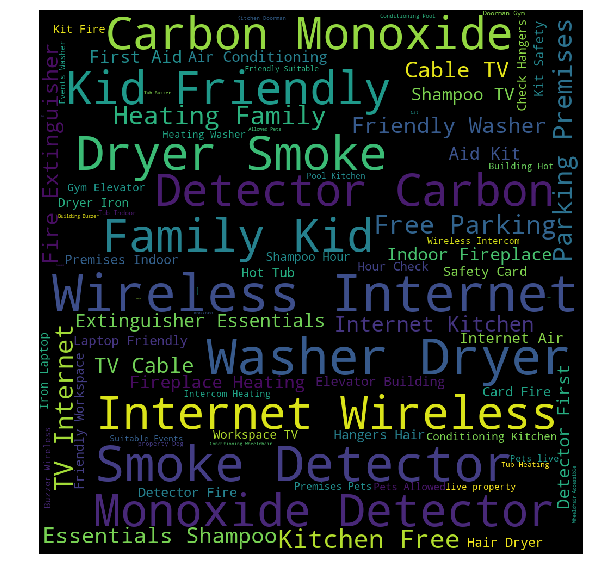

In [247]:
token2=' '.join(token1) 
wordcloud = WordCloud(width = 1000, height = 1000).generate(token2)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
# plt.show()

In [ ]:
token2=' '.join(token1) what is this

# Business Question 2: What are the key factors that influence price? 

# 3. a) Data Cleaning and Preparation for Numeric Variables

In [248]:
temp=df.copy()


In [249]:
df.select_dtypes(include=['int64','float64']).columns

Index([u'id', u'scrape_id', u'host_id', u'host_listings_count',
       u'host_total_listings_count', u'latitude', u'longitude',
       u'accommodates', u'bathrooms', u'bedrooms', u'beds', u'square_feet',
       u'price', u'guests_included', u'minimum_nights', u'maximum_nights',
       u'availability_30', u'availability_60', u'availability_90',
       u'availability_365', u'number_of_reviews', u'review_scores_rating',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'license',
       u'calculated_host_listings_count', u'reviews_per_month'],
      dtype='object')

In [250]:
#dropping the weekly and monthly price because of high percentage of missing values
temp.drop(['weekly_price','monthly_price'],axis=1,inplace=True)

In [9]:
type(temp)

pandas.core.frame.DataFrame

Some of the fields which should be numeric were object due to various reasons such as $ sign or a % sign. 

In [251]:
#converting the fields to numeric
temp['security_deposit']=temp.security_deposit.str.replace('$','')
temp['security_deposit']=temp.security_deposit.str.replace(',','')
temp['security_deposit']=pd.to_numeric(temp['security_deposit'])
temp['cleaning_fee']=temp.cleaning_fee.str.replace('$','')
temp['cleaning_fee']=temp.cleaning_fee.str.replace(',','')
temp['cleaning_fee']=pd.to_numeric(temp['cleaning_fee'])
temp['extra_people']=temp.extra_people.str.replace('$','')
temp['extra_people']=temp.extra_people.str.replace(',','')
temp['extra_people']=pd.to_numeric(temp['extra_people'])


In [252]:
temp['host_acceptance_rate']=temp.host_acceptance_rate.str.replace('%','')
temp['host_acceptance_rate']=pd.to_numeric(temp['host_acceptance_rate'])
temp['host_response_rate']=temp.host_response_rate.str.replace('%','')
temp['host_response_rate']=pd.to_numeric(temp['host_response_rate'])

Dropping values where there are no reviews for the listing

In [253]:
temp=temp[temp.review_scores_rating >0]

In [254]:
a=temp.select_dtypes(include=['float64','int64']).isnull().mean()
a[a>0]

host_response_rate             0.098392
host_acceptance_rate           0.150426
bathrooms                      0.003784
bedrooms                       0.001892
square_feet                    0.971302
security_deposit               0.492274
cleaning_fee                   0.239357
review_scores_accuracy         0.003469
review_scores_cleanliness      0.001892
review_scores_checkin          0.003469
review_scores_communication    0.001261
review_scores_location         0.002523
review_scores_value            0.002838
license                        1.000000
dtype: float64

Dropping variables that have almost all missing values

In [255]:
temp.drop(['license','square_feet'],axis=1,inplace=True)

Assuming that security deposit and fee blank values mean zero charges

In [256]:
temp['cleaning_fee']=temp.cleaning_fee.fillna(0)
temp['security_deposit']=temp.security_deposit.fillna(0)

 Imputing remaining values based on Neighbourhood location and Room Type

In [257]:
temp['host_response_rate'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['host_response_rate'].apply(lambda x: x.fillna(x.mean()))

In [258]:
temp['host_acceptance_rate'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['host_acceptance_rate'].apply(lambda x: x.fillna(x.mean()))

In [259]:
temp['review_scores_accuracy'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['review_scores_accuracy'].apply(lambda x: x.fillna(x.mean()))
temp['review_scores_cleanliness  '] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['review_scores_cleanliness'].apply(lambda x: x.fillna(x.mean()))
temp['review_scores_checkin'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['review_scores_checkin'].apply(lambda x: x.fillna(x.mean()))
temp['review_scores_communication'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['review_scores_communication'].apply(lambda x: x.fillna(x.mean()))
temp['review_scores_location'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['review_scores_location'].apply(lambda x: x.fillna(x.mean()))
temp['review_scores_value'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['review_scores_value'].apply(lambda x: x.fillna(x.mean()))

temp['bedrooms'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['bedrooms'].apply(lambda x: x.fillna(x.mean()))
temp['bathrooms'] = temp.groupby(['neighbourhood_cleansed','room_type'], sort=False)['bathrooms'].apply(lambda x: x.fillna(x.mean()))

Some missing values still present after all the cleaning above

In [260]:
a=temp.select_dtypes(include=['float64','int64']).isnull().mean()
a[a>0]

host_response_rate           0.000946
host_acceptance_rate         0.000946
review_scores_cleanliness    0.001892
dtype: float64

In [261]:
temp['host_acceptance_rate']=temp.host_acceptance_rate >0
temp['review_scores_cleanliness']=temp.review_scores_cleanliness >0
temp['host_response_rate']=temp.host_acceptance_rate >0


# 3. b) Data Cleaning and Preparation for Categorical Variables

In [262]:
b=temp.select_dtypes(include=['object']).isnull().mean()
b[b>0]

summary                  0.052665
space                    0.103437
neighborhood_overview    0.232734
notes                    0.373384
transit                  0.203091
thumbnail_url            0.081047
medium_url               0.081047
xl_picture_url           0.081047
host_about               0.181962
host_response_time       0.098392
host_neighbourhood       0.064018
neighbourhood            0.096184
zipcode                  0.001892
dtype: float64

Dropping the unrequired fields

In [263]:
temp.drop(['summary','space','neighborhood_overview','notes','transit','thumbnail_url','medium_url','xl_picture_url',
          'host_about','host_response_time','host_neighbourhood','neighbourhood'],axis=1,inplace=True)

In [264]:
temp.shape

(3171, 77)

In [265]:
temp.select_dtypes(include=['object']).columns

Index([u'listing_url', u'last_scraped', u'name', u'description',
       u'experiences_offered', u'picture_url', u'host_url', u'host_name',
       u'host_since', u'host_location', u'host_is_superhost',
       u'host_thumbnail_url', u'host_picture_url', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood_cleansed', u'neighbourhood_group_cleansed', u'city',
       u'state', u'zipcode', u'market', u'smart_location', u'country_code',
       u'country', u'is_location_exact', u'property_type', u'room_type',
       u'bed_type', u'amenities', u'calendar_updated', u'has_availability',
       u'calendar_last_scraped', u'first_review', u'last_review',
       u'requires_license', u'jurisdiction_names', u'instant_bookable',
       u'cancellation_policy', u'require_guest_profile_picture',
       u'require_guest_phone_verification'],
      dtype='object')

Dropping variables which have only a single count. No variability offered by these variables

In [266]:
temp['experiences_offered'].value_counts()

none    3171
Name: experiences_offered, dtype: int64

In [267]:
temp['has_availability'].value_counts()

t    3171
Name: has_availability, dtype: int64

In [268]:
temp['requires_license'].value_counts()

f    3171
Name: requires_license, dtype: int64

In [269]:
temp.drop(['experiences_offered','has_availability','requires_license'],axis=1,inplace=True)

Encoding some of the categorical variables to 1 and 0

In [270]:
temp['host_is_superhost'].value_counts()

f    2420
t     751
Name: host_is_superhost, dtype: int64

In [271]:
temp['host_is_superhost']=temp['host_is_superhost'].replace({'f': 0, 't': 1})

In [272]:
temp['host_is_superhost'].value_counts()

0    2420
1     751
Name: host_is_superhost, dtype: int64

In [273]:
temp['host_has_profile_pic'].value_counts()

t    3166
f       5
Name: host_has_profile_pic, dtype: int64

In [274]:
temp['host_has_profile_pic']=temp['host_has_profile_pic'].replace({'f': 0, 't': 1})

In [275]:
temp['host_identity_verified']=temp['host_identity_verified'].replace({'f': 0, 't': 1})

In [276]:
temp['is_location_exact']=temp['is_location_exact'].replace({'f': 0, 't': 1})

In [277]:
temp['instant_bookable']=temp['instant_bookable'].replace({'f': 0, 't': 1})

In [278]:
temp['require_guest_profile_picture'].value_counts()
 

f    2876
t     295
Name: require_guest_profile_picture, dtype: int64

In [279]:
temp['require_guest_phone_verification'].value_counts()

f    2823
t     348
Name: require_guest_phone_verification, dtype: int64

In [280]:
temp['require_guest_profile_picture']=temp['require_guest_profile_picture'].replace({'f': 0, 't': 1})
temp['require_guest_phone_verification']=temp['require_guest_phone_verification'].replace({'f': 0, 't': 1})

Dropping the unrequired variables again

In [282]:
temp.drop(['listing_url', 'last_scraped', 'name', 'description',
        'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location' ,'host_thumbnail_url', 'host_picture_url', 'host_verifications',
       'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country','amenities', 'calendar_updated', 
       'calendar_last_scraped', 'first_review', 'last_review',
    'jurisdiction_names'],axis=1,inplace=True)

In [283]:
temp.shape

(3171, 46)

In [284]:
temp.select_dtypes(include=['object']).columns

Index([u'property_type', u'room_type', u'bed_type', u'cancellation_policy'], dtype='object')

In [292]:
temp1=temp.copy()

Creating dummy variables for the final categorical variables included

In [293]:
b=pd.get_dummies(temp1.room_type, prefix='room_type')
c=pd.get_dummies(temp1.bed_type, prefix='bed_type')
d=pd.get_dummies(temp1.cancellation_policy, prefix='cancel_policy')

temp1.drop(['room_type','property_type','bed_type','cancellation_policy'],axis=1,inplace=True)
temp1.columns

Index([u'id', u'scrape_id', u'host_id', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_listings_count',
       u'host_total_listings_count', u'host_has_profile_pic',
       u'host_identity_verified', u'latitude', u'longitude',
       u'is_location_exact', u'accommodates', u'bathrooms', u'bedrooms',
       u'beds', u'price', u'security_deposit', u'cleaning_fee',
       u'guests_included', u'extra_people', u'minimum_nights',
       u'maximum_nights', u'availability_30', u'availability_60',
       u'availability_90', u'availability_365', u'number_of_reviews',
       u'review_scores_rating', u'review_scores_accuracy',
       u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'instant_bookable',
       u'require_guest_profile_picture', u'require_guest_phone_verification',
       u'calculated_host_listings_count', u'reviews_per_month',
       u'review_sc

In [294]:
# Joining the dataset with the dummy categorical variables
temp1=pd.concat([temp1,b,c,d],axis=1)


We have chosen availability_365. Hence we have dropped the other variables such as availablity_30 and 60 as they will be highly correlated to each other

In [295]:
#dropping some other fields after having a look at the dataset
temp1.drop(['host_acceptance_rate','id','host_id','scrape_id','availability_30','availability_60','availability_90'],axis=1,inplace=True)
temp1.drop(['latitude','longitude'],axis=1,inplace=True)

In [296]:
temp1.columns

Index([u'host_response_rate', u'host_is_superhost', u'host_listings_count',
       u'host_total_listings_count', u'host_has_profile_pic',
       u'host_identity_verified', u'is_location_exact', u'accommodates',
       u'bathrooms', u'bedrooms', u'beds', u'price', u'security_deposit',
       u'cleaning_fee', u'guests_included', u'extra_people', u'minimum_nights',
       u'maximum_nights', u'availability_365', u'number_of_reviews',
       u'review_scores_rating', u'review_scores_accuracy',
       u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'instant_bookable',
       u'require_guest_profile_picture', u'require_guest_phone_verification',
       u'calculated_host_listings_count', u'reviews_per_month',
       u'review_scores_cleanliness  ', u'room_type_Entire home/apt',
       u'room_type_Private room', u'room_type_Shared room', u'bed_type_Airbed',
       u'bed_type_Couch', u'bed_typ

# 4. MODELLING AND CORRELATION ANALYSIS

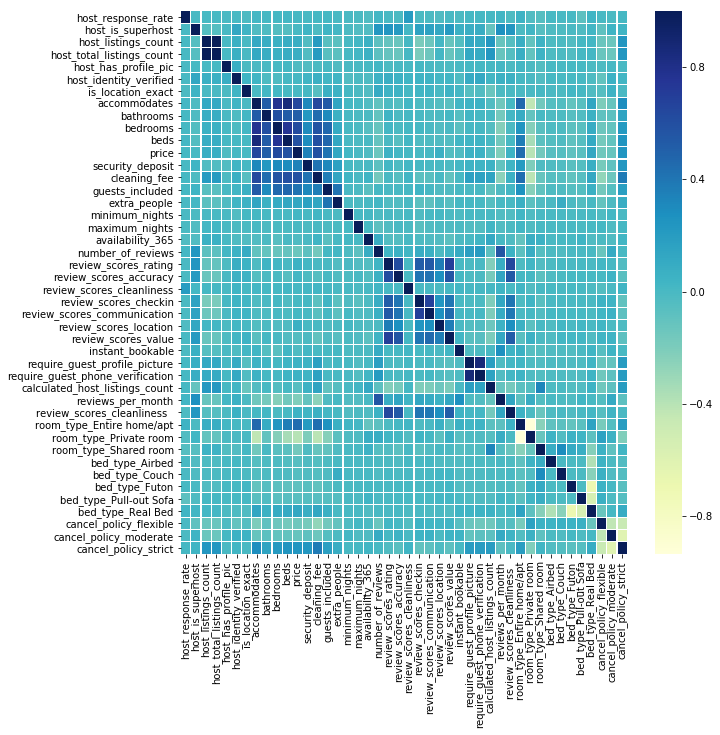

In [297]:
correlation=temp1.corr()
f, ax = plt.subplots(figsize =(10, 10))
sns.heatmap(correlation, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [298]:

temp2=temp1[['price','accommodates','bathrooms','bedrooms','beds','cleaning_fee','guests_included','room_type_Entire home/apt','room_type_Private room'
            ,'room_type_Shared room']]
temp2.corr()

,price,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.648382,0.509717,0.627956,0.584570,0.590014,0.415353,0.442250,-0.395351,-0.158546
accommodates,0.648382,1.000000,0.527322,0.770422,0.861727,0.640941,0.544220,0.469275,-0.426045,-0.150379
bathrooms,0.509717,0.527322,1.000000,0.605307,0.527410,0.446803,0.300763,0.097866,-0.103464,0.008570
bedrooms,0.627956,0.770422,0.605307,1.000000,0.753155,0.576646,0.468663,0.242844,-0.227056,-0.059832
beds,0.584570,0.861727,0.527410,0.753155,1.000000,0.599922,0.476172,0.361576,-0.344889,-0.070446
cleaning_fee,0.590014,0.640941,0.446803,0.576646,0.599922,1.000000,0.364993,0.436953,-0.406249,-0.113929
guests_included,0.415353,0.544220,0.300763,0.468663,0.476172,0.364993,1.000000,0.266078,-0.239040,-0.092167
room_type_Entire home/apt,0.442250,0.469275,0.097866,0.242844,0.361576,0.436953,0.266078,1.000000,-0.934986,-0.246378
room_type_Private room,-0.395351,-0.426045,-0.103464,-0.227056,-0.344889,-0.406249,-0.239040,-0.934986,1.000000,-0.113391
room_type_Shared room,-0.158546,-0.150379,0.008570,-0.059832,-0.070446,-0.113929,-0.092167,-0.246378,-0.113391,1.000000


We will look at the variables which offer the strongest correlation to price and use them for the model build

In [72]:
def lin_reg(df,response_col,test_size=0.3,rand_state=100):
    """
    INPUT:
    df- a dataframe holding all variables of interest
    response_col- a string holding the name of the column
    test_size- a float between [0,1] about what proportion of data should be in the test dataset
    rand_state- an int that is provided as the random state for splitting the data into training and test
    
    OUTPUT:
    test_score - float- r2 score on the test data
    train_score - float- r2 score on the train data
    lm_model- model object from sklearn
    X_train, y_train,x_test,y_test- output from sklearn train test split used for optimal model
    """
    
    #Split into explanatory and response variables
    X=df.drop(response_col,axis=1)
    y=df[response_col]
    
    #Split into train and test
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=test_size,random_state=rand_state)
    
    #Normalize values
    lm_model=LinearRegression(normalize=True)
    
    #Fitting model on training data
    lm_model.fit(X_train,y_train)
    
    #Predictions using model on test and train data
    y_test_preds=lm_model.predict(X_test)
    y_train_preds=lm_model.predict(X_train)
    
    #Model scoring
    test_score=r2_score(y_test,y_test_preds)
    train_score=r2_score(y_train,y_train_preds)
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test
    

In [73]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test=lin_reg(temp2,'price')

An R2 squared test value of 0.52 indicates a strictly decent model

In [74]:
test_score

0.5213110214150586

In [75]:
train_score

0.5576674930139603

In [76]:
def coef_weights(coefficients,X_train):
    """
    INPUT:
    coefficients- the coefficients of the linear model
    X_train- the training data
    OUTPUT:
    coefs_df- a dataframe holding the coefficient, estimate and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model
    """
    
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=X_train.columns
    coefs_df['coefs']=lm_model.coef_
    coefs_df['abs_coefs']=np.abs(lm_model.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    return coefs_df



In [77]:
coef_df=coef_weights(lm_model.coef_,X_train)

As expected from the correlation analysis, Room_type, bathrooms and bedrooms contribute the most to predicting price and are significant predictors

In [299]:
coef_df.head(10)

,est_int,coefs,abs_coefs
8,room_type_Shared room,-48.131849,48.131849
1,bathrooms,32.490846,32.490846
2,bedrooms,24.238528,24.238528
6,room_type_Entire home/apt,22.258805,22.258805
7,room_type_Private room,-17.025408,17.025408
0,accommodates,5.562879,5.562879
5,guests_included,5.447128,5.447128
3,beds,-3.004977,3.004977
4,cleaning_fee,0.341423,0.341423


# Business Question 3: Is there a relationship between review comments and prices?

In [300]:
df_reviews=pd.read_csv('reviews.csv')

In [301]:
df_reviews=df_reviews.dropna()

In [302]:
df_reviews['comments'] = df_reviews['comments'].astype(str)
# Lowercase for all reviews
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [303]:
df_reviews['comments'].head()

0    cute and cozy place. perfect location to every...
1    kelly has a great room in a very central locat...
2    very spacious apartment, and in a great neighb...
3    close to seattle center and all it has to offe...
4    kelly was a great host and very accommodating ...
Name: comments, dtype: object

In [304]:
#removing special characters
df_reviews['comments']=  [re.sub(r'[^a-zA-Z0-9]+',' ', str(x)) for x in df_reviews['comments']]


In [305]:
#removing stopwords
english_stopwords = stopwords.words('english') 
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in english_stopwords))

In [306]:
#lemmatizing words
lemmatizer=WordNetLemmatizer()
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))

Here we are creating a sentiment score using the SentimentIntensityAnalyzer function. It creates a positive/negative/neutral score for each row along with a compound score

In [307]:
Senti_analyze = SentimentIntensityAnalyzer()

df_reviews['Polarity_Score']=""
df_reviews['Negative_Score']=0.0
df_reviews['Positive_Score']=0.0
df_reviews['Neutral_Score']=0.0
df_reviews['Compound_Score']=0.0

for index,row in df_reviews.iterrows():
    temp_index = Senti_analyze.polarity_scores(row['comments'])
    df_reviews.at[index,'Polarity_Score'] = temp_index
    df_reviews.at[index,'Negative_Score'] = temp_index['neg']
    df_reviews.at[index,'Positive_Score'] = temp_index['pos']
    df_reviews.at[index,'Neutral_Score']= temp_index['neu']
    df_reviews.at[index,'Compound_Score'] = temp_index['compound']
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Polarity_Score,Negative_Score,Positive_Score,Neutral_Score,Compound_Score
0,7202016,38917982,2015-07-19,28943674,Bianca,cute cozy place perfect location everything,"{u'neg': 0.0, u'neu': 0.374, u'pos': 0.626, u'...",0.000,0.626,0.374,0.7717
1,7202016,39087409,2015-07-20,32440555,Frank,kelly great room central location beautiful bu...,"{u'neg': 0.0, u'neu': 0.476, u'pos': 0.524, u'...",0.000,0.524,0.476,0.9861
2,7202016,39820030,2015-07-26,37722850,Ian,spacious apartment great neighborhood kind apa...,"{u'neg': 0.057, u'neu': 0.545, u'pos': 0.398, ...",0.057,0.398,0.545,0.9325
3,7202016,40813543,2015-08-02,33671805,George,close seattle center offer ballet theater muse...,"{u'neg': 0.081, u'neu': 0.618, u'pos': 0.3, u'...",0.081,0.300,0.618,0.7778
4,7202016,41986501,2015-08-10,34959538,Ming,kelly great host accommodating great neighborh...,"{u'neg': 0.0, u'neu': 0.435, u'pos': 0.565, u'...",0.000,0.565,0.435,0.9769


In [309]:
df_reviews1=df_reviews.groupby(['listing_id'])['Compound_Score'].mean()
df_reviews1=pd.DataFrame(df_reviews1)



In [310]:
df_price=df[['price','id']]
type(df_price)

pandas.core.frame.DataFrame

In [311]:
Final_review=pd.merge(df_reviews1,df_price,left_on='listing_id',right_on='id')

In [ ]:
Final_review.head()

There is no correlation between review comments and price

In [313]:
Final_review.corr()

,Compound_Score,price,id
Compound_Score,1.000000,-0.012365,-0.031847
price,-0.012365,1.000000,-0.055662
id,-0.031847,-0.055662,1.000000


As can be seen from the graph below, the positive scores are way higher than the negative ones indicating that people have had more pleasant experiences than bad ones.

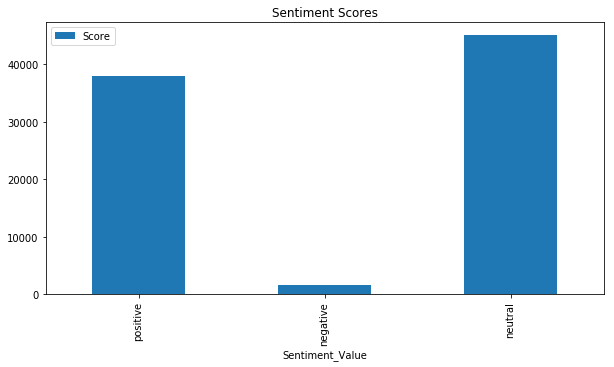

In [315]:
sentiments={'Sentiment_Value': ['positive', 'negative', 'neutral'], 'Score': [np.sum(df_reviews['Positive_Score']),np.sum(df_reviews['Negative_Score']), np.sum(df_reviews['Neutral_Score'])]}
sentiments=pd.DataFrame(sentiments)
sentiments.head()
sentiments.plot.bar(x="Sentiment_Value",title='Sentiment Scores',figsize=(10,5))